In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sympy as syms
import math

N=50
x_start,x_end = -2.0,2.0
y_start,y_end =-1.0,1.0
x = np.linspace(x_start,x_end,N)
y=np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [2]:
gam = 5.0
x_vor, y_vor = 0.0,0.0



In [3]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [4]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [5]:
u_vor,v_vor = get_velocity_vortex(gam,x_vor,y_vor,X,Y)
psi_vor = get_stream_function_vortex(gam,x_vor,y_vor,X,Y)

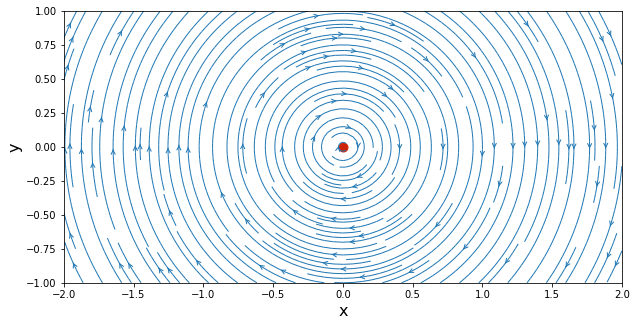

In [6]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_vor, v_vor,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vor, y_vor, color='#CD2305', s=80, marker='o');

In [7]:
strength_sink = -1.0
x_sink, y_sink = 0.0,0.0

def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [8]:
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink,y_sink,X,Y)
u = u_sink + u_vor
v = v_sink+v_vor


In [9]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [10]:
psi_sink = get_stream_function_sink(strength_sink, x_sink,y_sink,X,Y)
psi =psi_sink + psi_vor


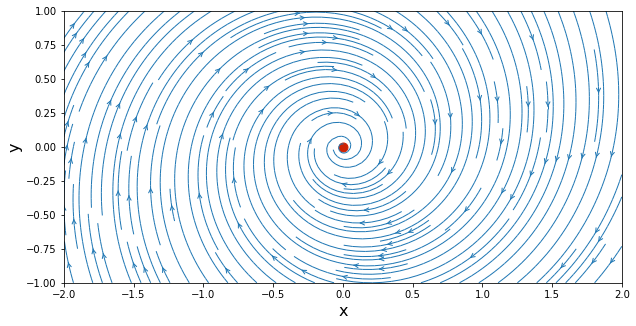

In [11]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vor, y_vor, color='#CD2305', s=80, marker='o');

In [12]:
x_vortex_inf = np.linspace(-2,2,17)
y_vortex_inf = np.zeros((17,1),dtype=float)
gam_vor_inf = np.ones((17,1),dtype=float)




In [13]:
U_vor_inf = 0
V_vor_inf = 0
for i in range(0,17):
    u_vor_inf,v_vor_inf = get_velocity_vortex(gam_vor_inf[i],x_vortex_inf[i],y_vortex_inf[i],X,Y)
    U_vor_inf += u_vor_inf
    V_vor_inf += v_vor_inf
    
    

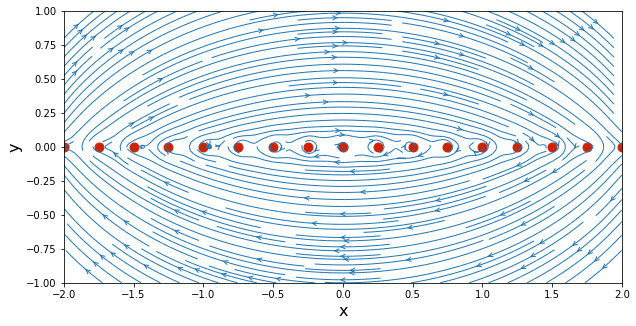

In [14]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, U_vor_inf, V_vor_inf, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex_inf, y_vortex_inf, color='#CD2305', s=80, marker='o');

In [32]:
gam_sin = 1.0
a = 0.25
u_sin= (gam_sin*np.sinh(2*math.pi*Y/a))/(2*a*(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/2)))
                                         

v_sin= -(gam_sin*np.sin(2*math.pi*X/a))/(2*a*(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/2)))

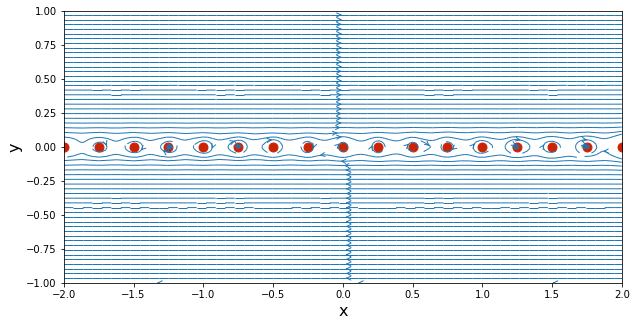

In [33]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sin, v_sin, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex_inf, y_vortex_inf, color='#CD2305', s=80, marker='o');
